# 가중치 초기화 함수 (1)
초기화할 레이어를 직접 지정  
레이어가 많아지면 코드도 길어지고 관리 어려움

In [1]:

from torch import nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 2),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(2, 1)  # fc: Fully Connected
        self._init_weights()       # Xavier 초기화로 가중치의 분포를 U(-a, a) 형태로 균등하게 설정.

    def _init_weights(self):
        nn.init.xavier_uniform_(self.layer[0].weight)  # 제이비어 초기화
        self.layer[0].bias.data.fill_(0.01)            # 편향을 0.01로 초기화

        nn.init.xavier_uniform_(self.fc.weight)        # 제이비어 초기화
        self.fc.bias.data.fill_(0.01)                  # 편향을 0.01로 초기화


model = Net()

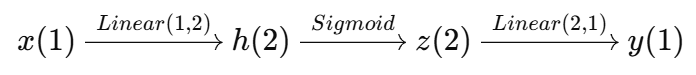

가중치 초기화는 _init_weights 메서드에서 모델 매개변수의 초기값을 설정한다.  
_init_weights 메서드는 사용자 정의 메서드로, 메서드 이름 앞에 \_를 붙여 Protected Method로 사용한다.  
<br>
가중치 초기화 메서드를 정의했다면, 가중치가 필요한 모듈, 클래스, 함수 등을 초기화한다.  
<br>
가중치는 제이비어 초기화를 사용하고 편향은 상수 초기화를 적용해 본다.

# 가중치 초기화 함수 (2)
apply를 이용한 모듈 순회 자동 초기화

In [4]:
from torch import nn

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Linear(1, 2),
        nn.Sigmoid()
    )
    self.fc = nn.Linear(2, 1)
    self.apply(self._init_weights)  # _init_weights가 각 Linear, Sigmoid 등 모든 서브 모듈에 순회하며 호출된다.

  def _init_weights(self, module):
    if isinstance(module, nn.Linear):         # module이 Linear 계층이면: (isinstance: 식별함수)
      nn.init.xavier_uniform_(module.weight)  # Xavier 균등 분포
      nn.init.constant_(module.bias, 0.01)    # 상수 0.01
    print(f"Apply : {module}")

Model = Net()

Apply : Linear(in_features=1, out_features=2, bias=True)
Apply : Sigmoid()
Apply : Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
)
Apply : Linear(in_features=2, out_features=1, bias=True)
Apply : Net(
  (layer): Sequential(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): Sigmoid()
  )
  (fc): Linear(in_features=2, out_features=1, bias=True)
)


이렇게 하면  
- 아까처럼 직접 각 레이어를 가져와 초기화하지 않아도 됨 → 코드가 깔끔
- Sigmoid, ReLU 등 Linear가 아닌 모듈에는 아무 일도 하지 않음  
- 레이어 늘어나도 자동 적용